<a href="https://colab.research.google.com/github/CristianCosci/AGV-Project/blob/refactoring_mobilenet/AGV_emotions_attack/test_sctipt/prove_AGV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone -b refactoring_mobilenet https://github.com/CristianCosci/AGV-Project.git

!pip install noise

Cloning into 'AGV-Project'...
remote: Enumerating objects: 755, done.
remote: Counting objects: 100% (755/755), done.
remote: Compressing objects: 100% (521/521), done.
remote: Total 755 (delta 198), reused 683 (delta 144), pack-reused 0
Receiving objects: 100% (755/755), 32.90 MiB | 32.55 MiB/s, done.
Resolving deltas: 100% (198/198), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached noise-1.2.2-cp37-cp37m-linux_x86_64.whl


In [ ]:
import sys, os
os.chdir('/content/AGV-Project/AGV_emotions_attack/attacks_emotions/agv/')

import random
import argparse
#set modules path
sys.path.append(os.path.dirname('attack.py'))
sys.path.append(os.path.join(os.path.dirname('attack.py'),'..'))
sys.path.append(os.path.join(os.path.dirname('attack.py'),'..', ".."))
import numpy as np
import pandas as pd

from fitness import inv_attack_rate, inv_attack_rate_multiple
from agv_filters import Filters
from agv_model_loader import ModelLoader
from agv_optimizer import AGVOptimizer
from agv_optimizer import Individual
from agv_datasets import build_model_and_dataset
from agv_datasets import get_model_name_from_dataset
from agv_datasets import database_and_model
from agv_distances import get_distance_functions
from agv_metrics import compute_metricts

from agv_tests import test, test_fits, save_adv_ex  
from agv_tests import mkdir_p, save_adv_best
from log import Log

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils

model, _, _ = build_model_and_dataset('IMAGENET-MOBILENET')

images names:  ['65.1.JPEG', '970.2.JPEG', '230.3.JPEG', '809.4.JPEG', '516.5.JPEG', '57.6.JPEG', '334.7.JPEG', '415.8.JPEG', '674.9.JPEG', '332.10.JPEG', '109.11.JPEG', '286.12.JPEG', '370.13.JPEG', '757.14.JPEG', '595.15.JPEG', '147.16.JPEG', '108.17.JPEG', '23.18.JPEG', '478.19.JPEG', '517.20.JPEG', '334.21.JPEG', '173.22.JPEG', '948.23.JPEG', '727.24.JPEG', '23.25.JPEG', '846.26.JPEG', '270.27.JPEG', '167.28.JPEG', '55.29.JPEG', '858.30.JPEG', '324.31.JPEG', '573.32.JPEG', '150.33.JPEG', '981.34.JPEG', '586.35.JPEG', '887.36.JPEG', '32.37.JPEG', '398.38.JPEG', '777.39.JPEG', '74.40.JPEG', '516.41.JPEG', '756.42.JPEG', '129.43.JPEG', '198.44.JPEG', '256.45.JPEG', '725.46.JPEG', '565.47.JPEG', '167.48.JPEG', '717.49.JPEG', '394.50.JPEG', '92.51.JPEG', '29.52.JPEG', '844.53.JPEG', '591.54.JPEG', '358.55.JPEG', '468.56.JPEG', '259.57.JPEG', '994.58.JPEG', '872.59.JPEG', '588.60.JPEG', '474.61.JPEG', '183.62.JPEG', '107.63.JPEG', '46.64.JPEG', '842.65.JPEG', '390.66.JPEG', '101.67.JPEG'

In [ ]:
os.chdir('/content/AGV-Project/AGV_emotions_attack/')
file_list = os.listdir('attacks_emotions/datasets/images_dataset/ILSVRC2012_img_val_labeled_caffe_200')
origin_class = []
for name in file_list:
  splitted_name = name.split('.')
  origin_class.append(splitted_name[0])

origin_class = [int(i) for i in origin_class]
print(origin_class)

img_path = 'attacks_emotions/datasets/images_dataset/ILSVRC2012_img_val_labeled_caffe_200/'
images = []
for file in file_list:
  img = image.load_img(img_path + file, target_size=(224, 224))
  img_array = image.img_to_array(img)/255
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  images.append(img_array_expanded_dims)

images = np.vstack(images)

[637, 493, 498, 553, 21, 674, 198, 343, 236, 516, 887, 398, 620, 370, 92, 841, 705, 638, 479, 57, 468, 486, 358, 175, 504, 906, 771, 842, 457, 584, 703, 140, 118, 725, 565, 328, 970, 101, 627, 608, 487, 949, 230, 975, 548, 878, 352, 28, 212, 476, 937, 887, 361, 108, 780, 115, 324, 334, 595, 147, 544, 328, 632, 727, 272, 23, 977, 726, 257, 867, 392, 16, 483, 763, 664, 844, 875, 586, 230, 383, 339, 590, 390, 474, 872, 349, 149, 583, 645, 394, 270, 872, 659, 777, 449, 467, 373, 180, 717, 283, 159, 150, 852, 846, 686, 369, 160, 109, 473, 270, 934, 259, 415, 781, 366, 647, 248, 167, 163, 558, 196, 516, 424, 227, 158, 436, 29, 201, 858, 50, 396, 129, 32, 970, 937, 825, 256, 58, 934, 994, 573, 289, 993, 22, 167, 332, 70, 588, 666, 638, 107, 478, 751, 272, 720, 122, 74, 183, 935, 334, 686, 646, 981, 265, 276, 959, 969, 757, 277, 646, 718, 142, 65, 591, 275, 173, 213, 771, 330, 789, 788, 311, 23, 687, 870, 756, 802, 286, 809, 517, 80, 948, 528, 39, 173, 159, 55, 103, 46, 461]


In [ ]:
predictions = model.predict(images, batch_size=10)
result = imagenet_utils.decode_predictions(predictions)
pred_class = [np.argmax(x) for x in predictions]

id_different_img = []
for i in range(200):
  if pred_class[i] != origin_class[i]:
    print('ELEMENTO: {}, classe originale: {} --- classe predetta: {}'.format(i, origin_class[i], pred_class[i]))
    id_different_img.append(i)

49152/35363 [=========================================] - 0s 0us/step
ELEMENTO: 1, classe originale: 493 --- classe predetta: 894
ELEMENTO: 6, classe originale: 198 --- classe predetta: 196
ELEMENTO: 7, classe originale: 343 --- classe predetta: 360
ELEMENTO: 9, classe originale: 516 --- classe predetta: 431
ELEMENTO: 12, classe originale: 620 --- classe predetta: 681
ELEMENTO: 15, classe originale: 841 --- classe predetta: 903
ELEMENTO: 18, classe originale: 479 --- classe predetta: 436
ELEMENTO: 19, classe originale: 57 --- classe predetta: 65
ELEMENTO: 21, classe originale: 486 --- classe predetta: 889
ELEMENTO: 30, classe originale: 703 --- classe predetta: 637
ELEMENTO: 33, classe originale: 725 --- classe predetta: 505
ELEMENTO: 36, classe originale: 970 --- classe predetta: 795
ELEMENTO: 42, classe originale: 230 --- classe predetta: 231
ELEMENTO: 43, classe originale: 975 --- classe predetta: 977
ELEMENTO: 45, classe originale: 878 --- classe predetta: 810
ELEMENTO: 47, classe 

In [ ]:
name_file_different_img = []
for i in range(len(id_different_img)):
  name_file_different_img.append(file_list[id_different_img[i]])

print('file con predizione classe errata: {}'.format(name_file_different_img))
print()

order_different_img = []
for name in name_file_different_img:
  splitted_name = name.split('.')
  order_different_img.append(int(splitted_name[1]))

order_different_img.sort()
print('id ordinati dei file con classe differente {}'.format(order_different_img))
print(len(order_different_img))

file con predizione classe errata: ['493.162.JPEG', '198.44.JPEG', '343.136.JPEG', '516.5.JPEG', '620.151.JPEG', '841.70.JPEG', '479.85.JPEG', '57.6.JPEG', '486.108.JPEG', '703.192.JPEG', '725.46.JPEG', '970.2.JPEG', '230.3.JPEG', '975.150.JPEG', '878.104.JPEG', '28.88.JPEG', '937.155.JPEG', '361.181.JPEG', '108.17.JPEG', '780.94.JPEG', '115.154.JPEG', '272.156.JPEG', '392.124.JPEG', '664.119.JPEG', '875.146.JPEG', '230.180.JPEG', '383.92.JPEG', '474.61.JPEG', '394.50.JPEG', '777.39.JPEG', '467.71.JPEG', '717.49.JPEG', '150.33.JPEG', '369.87.JPEG', '259.57.JPEG', '415.8.JPEG', '167.28.JPEG', '558.140.JPEG', '196.176.JPEG', '516.41.JPEG', '436.175.JPEG', '32.37.JPEG', '58.84.JPEG', '22.128.JPEG', '167.48.JPEG', '332.10.JPEG', '666.168.JPEG', '638.184.JPEG', '74.40.JPEG', '183.62.JPEG', '686.114.JPEG', '265.147.JPEG', '969.139.JPEG', '646.118.JPEG', '718.121.JPEG', '173.22.JPEG', '213.161.JPEG', '311.125.JPEG', '23.18.JPEG', '528.137.JPEG', '46.64.JPEG']

id ordinati dei file con classe 

In [ ]:
import tensorflow as tf

images = []
for file in file_list:
  img = image.load_img(img_path + file, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  images.append(tf.keras.applications.mobilenet_v3.preprocess_input(img_array_expanded_dims))

images = np.vstack(images)

model = tf.keras.applications.MobileNetV3Large()

In [ ]:
predictions = model.predict(images, batch_size=10)
result = imagenet_utils.decode_predictions(predictions)
pred_class = [np.argmax(x) for x in predictions]

id_different_img = []
for i in range(200):
  if pred_class[i] != origin_class[i]:
    print('ELEMENTO: {}, classe originale: {} --- classe predetta: {}'.format(i, origin_class[i], pred_class[i]))
    id_different_img.append(i)

ELEMENTO: 1, classe originale: 493 --- classe predetta: 894
ELEMENTO: 3, classe originale: 553 --- classe predetta: 742
ELEMENTO: 7, classe originale: 343 --- classe predetta: 298
ELEMENTO: 8, classe originale: 236 --- classe predetta: 164
ELEMENTO: 15, classe originale: 841 --- classe predetta: 929
ELEMENTO: 18, classe originale: 479 --- classe predetta: 621
ELEMENTO: 19, classe originale: 57 --- classe predetta: 67
ELEMENTO: 21, classe originale: 486 --- classe predetta: 889
ELEMENTO: 22, classe originale: 358 --- classe predetta: 359
ELEMENTO: 25, classe originale: 906 --- classe predetta: 578
ELEMENTO: 29, classe originale: 584 --- classe predetta: 464
ELEMENTO: 30, classe originale: 703 --- classe predetta: 448
ELEMENTO: 33, classe originale: 725 --- classe predetta: 505
ELEMENTO: 39, classe originale: 608 --- classe predetta: 179
ELEMENTO: 43, classe originale: 975 --- classe predetta: 978
ELEMENTO: 53, classe originale: 108 --- classe predetta: 1
ELEMENTO: 64, classe originale: 

In [ ]:
name_file_different_img = []
for i in range(len(id_different_img)):
  name_file_different_img.append(file_list[id_different_img[i]])

print('file con predizione classe errata: {}'.format(name_file_different_img))
print()

order_different_img2 = []
for name in name_file_different_img:
  splitted_name = name.split('.')
  order_different_img2.append(int(splitted_name[1]))

order_different_img2.sort()
print('id ordinati dei file con classe differente {}'.format(order_different_img2))
print(len(order_different_img2))

file con predizione classe errata: ['493.162.JPEG', '553.132.JPEG', '343.136.JPEG', '236.134.JPEG', '841.70.JPEG', '479.85.JPEG', '57.6.JPEG', '486.108.JPEG', '358.55.JPEG', '906.106.JPEG', '584.190.JPEG', '703.192.JPEG', '725.46.JPEG', '608.110.JPEG', '975.150.JPEG', '108.17.JPEG', '272.156.JPEG', '392.124.JPEG', '664.119.JPEG', '875.146.JPEG', '383.92.JPEG', '474.61.JPEG', '394.50.JPEG', '270.91.JPEG', '872.59.JPEG', '777.39.JPEG', '449.193.JPEG', '467.71.JPEG', '180.191.JPEG', '150.33.JPEG', '369.87.JPEG', '259.57.JPEG', '415.8.JPEG', '248.178.JPEG', '167.28.JPEG', '163.141.JPEG', '558.140.JPEG', '196.176.JPEG', '516.41.JPEG', '158.170.JPEG', '436.175.JPEG', '858.30.JPEG', '32.37.JPEG', '22.128.JPEG', '167.48.JPEG', '638.184.JPEG', '720.112.JPEG', '74.40.JPEG', '183.62.JPEG', '686.114.JPEG', '981.34.JPEG', '265.147.JPEG', '646.118.JPEG', '718.121.JPEG', '65.1.JPEG', '213.161.JPEG', '789.159.JPEG', '311.125.JPEG', '23.18.JPEG', '528.137.JPEG', '173.115.JPEG', '46.64.JPEG']

id ordina

In [ ]:
for i in range(len(order_different_img2)):
  if(order_different_img[i] - order_different_img2[i] != 0):
    print(i)

In [ ]:
preprocessed_image = prepare_image('107.63.JPEG')
predictions = model.predict(preprocessed_image)

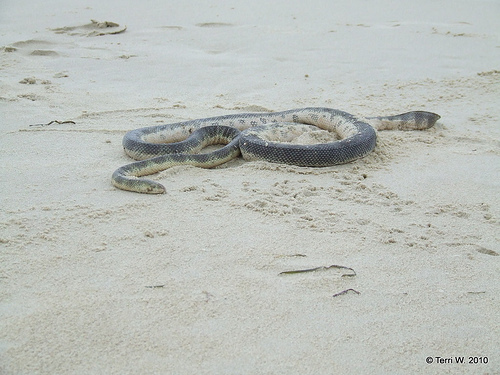

In [ ]:
from IPython.display import Image
os.chdir('/content/AGV-Project/AGV_emotions_attack/')
Image(filename=img_path+'65.1.JPEG')

In [ ]:
import tensorflow as tf

model1 = tf.keras.applications.MobileNet()

In [ ]:
img = image.load_img(img_path + '65.1.JPEG', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
predictions = model1.predict(tf.keras.applications.mobilenet_v2.preprocess_input(img_array_expanded_dims))
result = imagenet_utils.decode_predictions(predictions)
print(np.argmax((predictions)))

# images = []
# for file in file_list:
#   img = image.load_img(img_path + file, target_size=(224, 224))
#   img_array = image.img_to_array(img)
#   img_array_expanded_dims = np.expand_dims(img_array, axis=0)
#   images.append(tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims))

# images = np.vstack(images)

65


In [ ]:
result #v2

[[('n01751748', 'sea_snake', 0.33122173),
  ('n01698640', 'American_alligator', 0.12475887),
  ('n01755581', 'diamondback', 0.09797696),
  ('n01729322', 'hognose_snake', 0.09459284),
  ('n01740131', 'night_snake', 0.089884356)]]

In [ ]:
#v1
result

[[('n01751748', 'sea_snake', 0.33122158),
  ('n01698640', 'American_alligator', 0.124758705),
  ('n01755581', 'diamondback', 0.09797738),
  ('n01729322', 'hognose_snake', 0.09459226),
  ('n01740131', 'night_snake', 0.08988492)]]

In [ ]:
!python attacks_emotions/agv/agv_attack.py -l TEST.txt -o TEST.json -bs 1 -e 10 -pp  "offsprings" -ps "direct" -po "ES"  -np 10 -el true -s pareto -df1 ssim -db "IMAGENET-MOBILENET"  -nf 3 -r true -lf TEST.out

In [ ]:
!python attacks_emotions/agv/agv_attack.py -l TEST.txt -o TEST.json -bs 1 -e 1 -pp  "offsprings" -ps "direct" -po "ES"  -np 1 -el true -s pareto -df1 ssim -db "IMAGENET-MOBILENET"  -nf 3 -r true -lf TEST.out -sae 1

In [ ]:
!python attacks_emotions/agv/agv_attack.py -bf TEST/best_jsons -db "IMAGENET-MOBILENET" -sae_best=True -img_id 10